# Sleep Health Data Analysis

The Sleep Health and Lifestyle Dataset offers valuable insights into multiple factors influencing sleep patterns and overall lifestyle. Containing 400 rows and 13 columns, this Kaggle dataset covers a wide range of variables such as sleep duration, sleep quality, physical activity levels, stress levels, BMI categories, cardiovascular health indicators, and the presence of sleep disorders. 

The aim of this report is to explore and interpret key insights from the dataset using descriptive statistics and data visualization methods.

## Initialization and Preparing Data

In [1]:
# loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [2]:
sh = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep=','); sh.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


According to the documentation:  
  
`'Person ID'` — Unique identifier for each individual  
`'Age'` — Age of the person in years  
`'Gender'` — Male or Female  
`'Occupation'` — The occupation or profession of the person  
`'Sleep Duration'` — The number of hours the person sleeps per day  
`'Quality of SLeep'` — Rating of the quality of sleep (1 to 10)  
`'Physical Activity Level'` — The number of minutes the person engages in physical activity daily  
`'Stress Level'` — Rating of the person's stress level (1 to 10)  
`'BMI Category'` — The BMI category of the person (e.g., Underweight, Normal, Overweight)  
`'Blood Pressure'` — The blood pressure measurement of the person (systolic or diastolic pressure)  
`'Heart Rate'` — The resting heart rate of the person in beats per minute  
`'Daily Steps'` — The number of steps the person takes per day  
`'Sleep Disorder'` — The presence/absence of a sleep disorder (None, Insomnia, Sleep Apnea)   

In [3]:
sh.duplicated().sum() # checking for duplicates

0

In [4]:
sh.isna().sum() # checking for missing values

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

As shown above, although there are no duplicated rows, there are missing values in the `Sleep Disorder` varibale. Because the missing values are due to the studied person not having any sleep disorder, I will replace the NaN values with the word "None" for better usability and clarity.

In [6]:
# fill in missing values in the 'Sleep Disorder' category
sh['Sleep Disorder'].fillna('None', inplace=True); sh.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
sh.info() # general summary / information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


The general summary includes appropriate data types for each variable, so the data is ready to use.

## Studying Sleeping and Lifestyle

Now that the data is clean, I will calculate key descriptive statistics to provide a comprehensive overview of the factors that affect sleep and health lifestyle.

<Axes: title={'center': 'Average Quality of Sleep Across Occupations'}, xlabel='Occupation', ylabel='Average Quality of Sleep'>

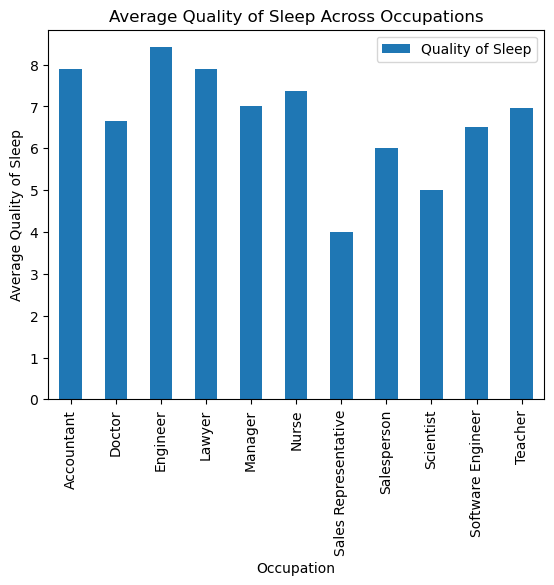

In [16]:
sleep_occ = sh.groupby('Occupation')['Quality of Sleep'].mean().reset_index()
sleep_occ.plot(x='Occupation', y='Quality of Sleep', 
                  xlabel='Occupation', ylabel='Average Quality of Sleep',
                 kind='bar', title='Average Quality of Sleep Across Occupations')

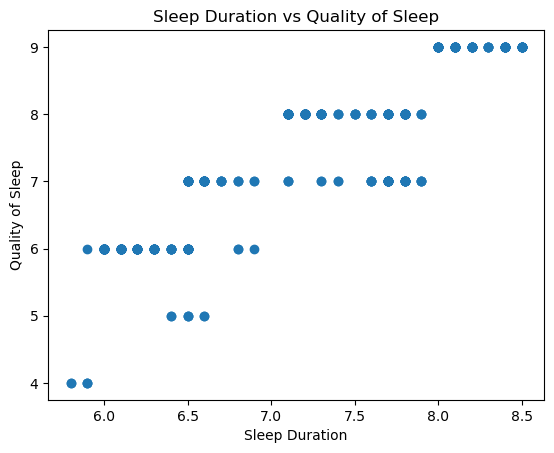

In [17]:
plt.scatter(x=sh['Sleep Duration'], y=sh['Quality of Sleep'])
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.title('Sleep Duration vs Quality of Sleep')
plt.show()